# Introduction

Here are the steps we will take in this notebook to train our RNN

1. Import Libraries
2. Prepare Dataset
3. Create RNN Model
4. hidden layer dimension is 100
5. number of hidden layer is 1
6. Instantiate Model
7. Instantiate Loss (Cross entropy loss)
8. Instantiate Optimizer (SGD Optimizer or Adam optimizer)
9. Traning the Model
10. Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchtext
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

/usr/local/lib/python3.10/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated

# Reading data

In [2]:
train_df = pd.read_csv('ML_train.csv') # data/ML/ML_train.csv
test_df = pd.read_csv('ML_test.csv') # data/ML/ML_test.csv

In [3]:
seed = 42

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

# Creation of validation set

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df['text'], train_df['humor'], test_size=0.1, random_state=42)

Conversion of labels into numpy arrays

In [5]:
# convert our train target values into a numpy array
train_targets_np = y_train.values
train_targets_np

array([False,  True, False, ..., False,  True,  True])

In [6]:
# convert validation target values into numpy array
valid_targets_np = y_valid.values
valid_targets_np

array([False,  True, False, ..., False,  True, False])

In [7]:
# convert test target values into a numpy array
test_targets_np = test_df['humor'].values
test_targets_np

array([ True,  True, False, ...,  True, False, False])

Conversion of features into numpy arrays

In [8]:
# convert the features column (text) into numpy arrays
train_features_numpy = X_train.values
train_features_numpy

array(['donald trump position get behind',
       'die going kill could live without',
       'man faced unimaginable suffering wrote definitive book happiness',
       ..., 'satya nadella said woman asking raise',
       'hey girl fitness well fitness cock mouth',
       'neighbor vampire stabbed heart wooden stake died'], dtype=object)

In [9]:
# do the same for the validation set
valid_features_numpy = X_valid.values
valid_features_numpy

array(['heroic food truck coming rescue california fire victim',
       'gay friend must businessmen keep talking partner',
       'jada pinkett smith share relationship advice facebook', ...,
       'happens mix world greatest drug booze',
       'general patton thanksgiving gave tank',
       'blink 182 album rereleased cassette tape'], dtype=object)

In [10]:
# do the same for the test set
test_features_numpy = test_df.loc[:, test_df.columns != 'humor'].values
test_features_numpy
#  = np.array([t[0] for t in test_features_numpy])
# test_features_numpy

array([['thought reddit joke today triangle rectangle fails'],
       ['much pirate pay corn buck ear'],
       ['hillary clinton sent book every gop candidateexcept one'],
       ...,
       ['best drug sex birth control'],
       ['fit link tony hortons rule gym success first yoga class'],
       ['positive prognosis climate negotiation']], dtype=object)

In [11]:
# checking that the data was split correctly
print(f"Train features length: {len(train_features_numpy)}")
print(f"Train targets length: {len(train_targets_np)}")
print(f"Validation features length: {len(valid_features_numpy)}")
print(f"Validation targets length: {len(valid_targets_np)}")
print(f"Test features length: {len(test_features_numpy)}")
print(f"Test targets length: {len(test_targets_np)}")

Train features length: 144000
Train targets length: 144000
Validation features length: 16000
Validation targets length: 16000
Test features length: 40000
Test targets length: 40000


# Convert text into tokens, and numericalize the text

Tokenize the text using a tokenizer

In [12]:
tokenizer = get_tokenizer("basic_english")

def tokenize(sent, tokenizer, max_length):
    tokens = tokenizer(sent)[:max_length]
    length = len(tokens)
    return {"tokens": tokens, "length": length}

In [13]:
max_length = 100

X_train = [tokenize(x, tokenizer, max_length) for x in train_features_numpy]
X_train

[{'tokens': ['donald', 'trump', 'position', 'get', 'behind'], 'length': 5},
 {'tokens': ['die', 'going', 'kill', 'could', 'live', 'without'], 'length': 6},
 {'tokens': ['man',
   'faced',
   'unimaginable',
   'suffering',
   'wrote',
   'definitive',
   'book',
   'happiness'],
  'length': 8},
 {'tokens': ['alex',
   'poythress',
   'always',
   'score',
   'point',
   'prefers',
   'amazing',
   'gifs'],
  'length': 8},
 {'tokens': ['watch', 'kid', 'get', 'hilariously', 'honest', 'thankful'],
  'length': 6},
 {'tokens': ['message',
   'kentucky',
   'clerk',
   'kim',
   'davis',
   'girl',
   'take',
   'romper'],
  'length': 8},
 {'tokens': ['hear', 'deaf', 'guy', 'could', 'sing', 'ya', 'well'],
  'length': 7},
 {'tokens': ['university',
   'leader',
   'showed',
   'college',
   'failure',
   'sexual',
   'assault',
   'case'],
  'length': 8},
 {'tokens': ['computer', 'said', 'hello', 'think', 'dell'], 'length': 5},
 {'tokens': ['call', 'fat', 'pirate', 'vast', 'matey'], 'length':

In [14]:
X_valid = np.array([tokenize(x, tokenizer, max_length) for x in valid_features_numpy])
X_valid

array([{'tokens': ['heroic', 'food', 'truck', 'coming', 'rescue', 'california', 'fire', 'victim'], 'length': 8},
       {'tokens': ['gay', 'friend', 'must', 'businessmen', 'keep', 'talking', 'partner'], 'length': 7},
       {'tokens': ['jada', 'pinkett', 'smith', 'share', 'relationship', 'advice', 'facebook'], 'length': 7},
       ...,
       {'tokens': ['happens', 'mix', 'world', 'greatest', 'drug', 'booze'], 'length': 6},
       {'tokens': ['general', 'patton', 'thanksgiving', 'gave', 'tank'], 'length': 5},
       {'tokens': ['blink', '182', 'album', 'rereleased', 'cassette', 'tape'], 'length': 6}],
      dtype=object)

In [15]:
X_test = np.array([tokenize(x[0], tokenizer, max_length) for x in test_features_numpy])
X_test

array([{'tokens': ['thought', 'reddit', 'joke', 'today', 'triangle', 'rectangle', 'fails'], 'length': 7},
       {'tokens': ['much', 'pirate', 'pay', 'corn', 'buck', 'ear'], 'length': 6},
       {'tokens': ['hillary', 'clinton', 'sent', 'book', 'every', 'gop', 'candidateexcept', 'one'], 'length': 8},
       ...,
       {'tokens': ['best', 'drug', 'sex', 'birth', 'control'], 'length': 5},
       {'tokens': ['fit', 'link', 'tony', 'hortons', 'rule', 'gym', 'success', 'first', 'yoga', 'class'], 'length': 10},
       {'tokens': ['positive', 'prognosis', 'climate', 'negotiation'], 'length': 4}],
      dtype=object)

Build a vocabulary to numericalize the text data on

In [16]:
min_freq = 5
special_tokens = ["<unk>", "<pad>"] # <pad> to pad sequences when they are not long enough

vocab = build_vocab_from_iterator(
    [x['tokens'] for x in X_train], # get only the tokens of each element
    min_freq=min_freq,
    specials=special_tokens,
)

In [17]:
vocab.get_itos()

['<unk>',
 '<pad>',
 'like',
 'call',
 'say',
 'get',
 'trump',
 'new',
 'photo',
 'one',
 'woman',
 'people',
 'make',
 'know',
 'day',
 'would',
 'man',
 'time',
 'go',
 'want',
 'joke',
 'video',
 'cannot',
 'take',
 'year',
 'donald',
 'thing',
 'way',
 'could',
 'black',
 'got',
 'best',
 'life',
 'kid',
 'never',
 'girl',
 'first',
 'two',
 'guy',
 'love',
 'look',
 'good',
 'world',
 'hear',
 'show',
 'really',
 'think',
 'need',
 'tell',
 'see',
 'back',
 'dog',
 'baby',
 'white',
 'difference',
 'always',
 'gay',
 'right',
 'u',
 '5',
 'find',
 'going',
 'sex',
 '10',
 'friend',
 'house',
 'work',
 'walk',
 'give',
 'bar',
 'ever',
 'many',
 'come',
 'favorite',
 'child',
 'mom',
 'food',
 'home',
 'wife',
 'american',
 'someone',
 'week',
 'stop',
 'change',
 'yous',
 'knock',
 'men',
 'still',
 'last',
 'bad',
 'called',
 'school',
 'keep',
 'little',
 'help',
 'name',
 'may',
 'today',
 'big',
 '2',
 'clinton',
 'star',
 'watch',
 'much',
 'said',
 'every',
 'put',
 'eat',


In [18]:
# get indices of unknown index andpad index
unk_index = vocab["<unk>"]
pad_index = vocab["<pad>"]

In [19]:
vocab.set_default_index(unk_index) # so that if some words are not in the vocabulary, we will use <unk> instead of that unknown word

Numericalizing the text data

In [20]:
def numericalize(sent, vocab):
    ids = vocab.lookup_indices(sent["tokens"]) # The lookup_indices() method looks up a list of tokens in our vocabulary
    return {"ids": ids}

In [21]:
X_train = [numericalize(x, vocab) for x in X_train]

In [22]:
X_train

[{'ids': [25, 6, 1785, 5, 375]},
 {'ids': [363, 61, 197, 28, 192, 174]},
 {'ids': [16, 4957, 0, 3554, 1629, 9752, 209, 1722]},
 {'ids': [3192, 0, 55, 1383, 528, 6377, 679, 2949]},
 {'ids': [102, 33, 5, 2627, 1840, 4127]},
 {'ids': [678, 2249, 5054, 416, 1824, 35, 23, 0]},
 {'ids': [43, 1532, 38, 28, 1367, 2158, 151]},
 {'ids': [1041, 433, 3227, 281, 2067, 376, 826, 350]},
 {'ids': [579, 104, 1496, 46, 3453]},
 {'ids': [3, 171, 506, 8598, 7350]},
 {'ids': [825, 412, 33, 1907, 801]},
 {'ids': [0, 2, 154, 8031]},
 {'ids': [45, 378, 270, 52, 153, 0]},
 {'ids': [986, 7581, 13, 535, 589, 1167]},
 {'ids': [812, 5955, 95, 2017, 10113]},
 {'ids': [765, 5669, 7537, 647, 31, 368, 848, 29, 368, 2082]},
 {'ids': [238, 27, 1998, 205, 12488, 3339, 0]},
 {'ids': [766, 6585, 4534, 2350, 0, 8522, 6574, 5486, 10209]},
 {'ids': [8615, 1470, 203, 3773, 260]},
 {'ids': [14212, 87, 11705, 572, 649, 0, 469, 10242, 268, 10514]},
 {'ids': [1124, 3642, 84, 2482, 10141, 2371, 8322]},
 {'ids': [3884, 4297, 412, 83

In [23]:
X_valid = [numericalize(x, vocab) for x in X_valid]
X_valid

[{'ids': [9854, 76, 1182, 316, 1975, 553, 244, 561]},
 {'ids': [56, 64, 292, 0, 92, 565, 1648]},
 {'ids': [8397, 9433, 976, 355, 396, 637, 336]},
 {'ids': [631, 147, 224, 1364, 168]},
 {'ids': [726, 3824, 2443, 2894, 3287, 1437, 5522, 1241, 14682]},
 {'ids': [1628, 367, 544, 5016, 5142]},
 {'ids': [0, 458, 3876, 1451, 1688, 508, 0]},
 {'ids': [0, 5486, 305, 508, 3314, 5846]},
 {'ids': [0, 0, 3951, 0, 429, 446, 8]},
 {'ids': [938, 3222, 742, 4089, 355, 1470, 1751, 2188, 2615]},
 {'ids': [25, 4385, 589, 1351, 226, 2, 2009, 589, 11319, 226]},
 {'ids': [803, 21, 818, 376, 574, 1123, 185, 202, 1679]},
 {'ids': [149, 407, 414, 0, 1384]},
 {'ids': [2732, 1421, 647, 241, 574, 1123, 7973, 12030, 0]},
 {'ids': [42, 178, 347, 296]},
 {'ids': [59, 242, 315, 105, 14]},
 {'ids': [1003, 1792, 2174, 3361, 12555, 4658, 13237, 1018, 678]},
 {'ids': [389, 1252, 1709, 23, 103, 66, 306, 389]},
 {'ids': [59, 26, 47, 82, 886, 19, 296]},
 {'ids': [22, 240, 107, 1203, 15, 9153]},
 {'ids': [634, 447, 264, 302, 

In [24]:
X_test = [numericalize(x, vocab) for x in X_test]
X_test

[{'ids': [259, 492, 20, 97, 4398, 0, 2288]},
 {'ids': [103, 506, 252, 1875, 2102, 871]},
 {'ids': [134, 100, 1674, 209, 105, 136, 0, 9]},
 {'ids': [814, 1144, 0, 7, 1603, 1000, 516, 187]},
 {'ids': [32, 1029, 5841, 0, 1952, 192]},
 {'ids': [2112, 54, 3366, 176, 3366, 176]},
 {'ids': [4556, 1174, 1975, 99, 2519, 0, 7044]},
 {'ids': [249, 1573, 15305, 10159, 377]},
 {'ids': [5651, 4000, 652, 1246, 5789, 16]},
 {'ids': [1009, 558, 11, 1009, 42, 0, 3994]},
 {'ids': [515, 1409, 2, 76, 189, 5]},
 {'ids': [2220, 73, 838, 4906, 8373]},
 {'ids': [21, 5622, 12630, 589, 10, 315]},
 {'ids': [972, 1049, 6902, 6902, 3793]},
 {'ids': [324, 1351, 672, 672, 29, 11]},
 {'ids': [11, 23, 3712, 8, 1884, 487]},
 {'ids': [5, 147, 3136, 5678, 0]},
 {'ids': [2077, 3346, 690, 49, 0]},
 {'ids': [385, 15, 72, 1273, 9215, 82, 0, 2481, 3903]},
 {'ids': [2112, 0, 2767, 1978, 8584, 676, 7533]},
 {'ids': [2471, 4795, 4078, 139, 1876, 2842, 3311, 32, 5125, 1068]},
 {'ids': [392, 92, 4019, 7007, 5, 8513]},
 {'ids': [570

Padding each sentence with our default padding value

In [25]:
X_train = [torch.as_tensor(x['ids']) for x in X_train]
X_train = torch.nn.utils.rnn.pad_sequence(X_train, batch_first=True, padding_value=pad_index)

In [26]:
X_train

tensor([[  25,    6, 1785,  ...,    1,    1,    1],
        [ 363,   61,  197,  ...,    1,    1,    1],
        [  16, 4957,    0,  ...,    1,    1,    1],
        ...,
        [   0,    0,  104,  ...,    1,    1,    1],
        [ 302,   35, 1969,  ...,    1,    1,    1],
        [1279,  968, 3334,  ...,    1,    1,    1]])

In [27]:
X_valid = [torch.as_tensor(x['ids']) for x in X_valid]
X_valid = torch.nn.utils.rnn.pad_sequence(X_valid, batch_first=True, padding_value=pad_index)

In [28]:
X_valid

tensor([[ 9854,    76,  1182,  ...,     1,     1,     1],
        [   56,    64,   292,  ...,     1,     1,     1],
        [ 8397,  9433,   976,  ...,     1,     1,     1],
        ...,
        [  392,  1479,    42,  ...,     1,     1,     1],
        [ 1196,  5128,   880,  ...,     1,     1,     1],
        [ 9668, 13791,  1060,  ...,     1,     1,     1]])

In [29]:
X_test = [torch.as_tensor(x['ids']) for x in X_test]
X_test = torch.nn.utils.rnn.pad_sequence(X_test, batch_first=True, padding_value=pad_index)

In [30]:
X_test

tensor([[ 259,  492,   20,  ...,    1,    1,    1],
        [ 103,  506,  252,  ...,    1,    1,    1],
        [ 134,  100, 1674,  ...,    1,    1,    1],
        ...,
        [  31,  297,   62,  ...,    1,    1,    1],
        [ 689, 1595, 2713,  ...,    1,    1,    1],
        [1637,    0,  310,  ...,    1,    1,    1]])

Convert the target values from numpy arrays into tensors

In [31]:
y_train = torch.as_tensor(train_targets_np.astype(float))
y_train

tensor([0., 1., 0.,  ..., 0., 1., 1.], dtype=torch.float64)

In [32]:
y_valid = torch.as_tensor(valid_targets_np.astype(float))
y_valid

tensor([0., 1., 0.,  ..., 0., 1., 0.], dtype=torch.float64)

In [33]:
y_test = torch.as_tensor(test_targets_np.astype(float))
y_test

tensor([1., 1., 0.,  ..., 1., 0., 0.], dtype=torch.float64)

# Using TensorDataset and DataLoader on our data

In [34]:
train = TensorDataset(X_train, y_train)
valid = TensorDataset(X_valid, y_valid)
test = TensorDataset(X_test, y_test)

In [35]:
BATCH_SIZE = 512

In [36]:
train_loader = DataLoader(train, batch_size = BATCH_SIZE , shuffle = True)
valid_loader = DataLoader(valid, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(test, batch_size = BATCH_SIZE, shuffle = True)

# Creating the RNN model

In [95]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers, dropout):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size, n_layers, batch_first=True, dropout=dropout if n_layers > 1 else 0)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x, hidden):
        embedded = self.embedding(x)
        output, hidden = self.rnn(embedded, hidden)
        output = self.dropout(output)  # Apply dropout after the RNN layers
        output = self.fc(output[:, -1, :])
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(self.n_layers, batch_size, self.hidden_size).to(next(self.parameters()).device) # hidden state is a tensor that stores information from previous time steps and is used to influence the current output.

# Training of the RNN model

https://github.com/keishinkickback/Pytorch-RNN-text-classification

In [96]:
vocab_size = len(vocab)
embedding_dim = 300
hidden_dim = 300
output_dim = 2 # binary classification
n_layers = 2
dropout = 0.5
# bidirectional = False
# dropout_rate = 0.5

model = RNN(
    vocab_size,
    hidden_dim,
    output_dim,
    n_layers,
    dropout
)

In [97]:
# number of trainable parameters for the LSTM network
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f"The model has {count_parameters(model):,} trainable parameters")

The model has 4,959,302 trainable parameters


In [98]:
# function to initialize weight of the LSTM network
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, nn.RNN):
        for name, param in m.named_parameters():
            if "bias" in name:
                nn.init.zeros_(param)
            elif "weight" in name:
                nn.init.orthogonal_(param)

In [99]:
model.apply(initialize_weights)

RNN(
  (embedding): Embedding(15325, 300)
  (rnn): RNN(300, 300, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=300, out_features=2, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [42]:
vectors = torchtext.vocab.GloVe()

.vector_cache/glove.840B.300d.zip: 2.18GB [06:50, 5.31MB/s]                            
100%|█████████▉| 2196016/2196017 [04:56<00:00, 7406.98it/s]


In [100]:
pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())

In [101]:
model.embedding.weight.data = pretrained_embedding

In [102]:
lr = 5e-4

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [103]:
criterion = nn.CrossEntropyLoss()

In [104]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [105]:
model = model.to(device)
criterion = criterion.to(device)

In [106]:
epochs = 10
train_acc = []
val_acc = []
train_loss_lst = []
val_loss_lst = []
best_valid_loss = float("inf")

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0
    epoch_train_correct = 0
    epoch_train_total = 0
    hidden = model.init_hidden(BATCH_SIZE).to(device)  # Initialize hidden state at the start of each epoch

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        targets = targets.view(-1).type(torch.LongTensor).to(device)
        batch_size = inputs.size(0) # Get the current batch size

        hidden = model.init_hidden(batch_size).to(device)  # Initialize hidden state for the current batch

        optimizer.zero_grad()
        output, hidden = model(inputs.to(device), hidden.to(device))  # Pass the hidden state to the RNN

        hidden = hidden.detach()
        train_loss = criterion(output, targets.to(device))
        train_loss.backward()
        optimizer.step()

        epoch_train_loss += train_loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(output.data, 1)
        epoch_train_total += targets.size(0)
        epoch_train_correct += (predicted == targets).sum().item()
    average_train_loss = epoch_train_loss / len(train_loader)
    train_accuracy = epoch_train_correct / epoch_train_total

    train_loss_lst.append(average_train_loss)
    train_acc.append(train_accuracy)

    model.eval()
    epoch_val_loss = 0
    epoch_val_correct = 0
    epoch_val_total = 0
    with torch.no_grad():
        for inputs, targets in valid_loader:
          inputs, targets = inputs.to(device), targets.to(device)
          targets = targets.view(-1).type(torch.LongTensor).to(device)

          batch_size = inputs.size(0)
          hidden = model.init_hidden(batch_size).to(device)

          output, hidden = model(inputs, hidden)
          val_loss = criterion(output, targets)

          epoch_val_loss += val_loss.item()

          # Calculate validation accuracy
          _, predicted = torch.max(output.data, 1)
          epoch_val_total += targets.size(0)
          epoch_val_correct += (predicted == targets).sum().item()

    average_val_loss = epoch_val_loss / len(valid_loader)
    val_accuracy = epoch_val_correct / epoch_val_total

    if average_val_loss < best_valid_loss:
        best_valid_loss = average_val_loss
        torch.save(model.state_dict(), "rnn.pt")

    val_loss_lst.append(average_val_loss)
    val_acc.append(val_accuracy)
    print(f'Epoch {epoch+1}, Training Loss: {train_loss.item(): .4f}, Training Accuracy: {train_accuracy:.4f},  Validation Loss: {val_loss.item(): .4f}, Validation Accuracy: {val_accuracy:.4f}')

Epoch 1, Training Loss:  0.2642, Training Accuracy: 0.8566,  Validation Loss:  0.2026, Validation Accuracy: 0.8981
Epoch 2, Training Loss:  0.2876, Training Accuracy: 0.9071,  Validation Loss:  0.1559, Validation Accuracy: 0.9072
Epoch 3, Training Loss:  0.1972, Training Accuracy: 0.9254,  Validation Loss:  0.1784, Validation Accuracy: 0.9078
Epoch 4, Training Loss:  0.2092, Training Accuracy: 0.9377,  Validation Loss:  0.1513, Validation Accuracy: 0.9103
Epoch 5, Training Loss:  0.1552, Training Accuracy: 0.9470,  Validation Loss:  0.2198, Validation Accuracy: 0.9064
Epoch 6, Training Loss:  0.1338, Training Accuracy: 0.9565,  Validation Loss:  0.3842, Validation Accuracy: 0.9077
Epoch 7, Training Loss:  0.1208, Training Accuracy: 0.9656,  Validation Loss:  0.3432, Validation Accuracy: 0.9055
Epoch 8, Training Loss:  0.0775, Training Accuracy: 0.9732,  Validation Loss:  0.2349, Validation Accuracy: 0.9039
Epoch 9, Training Loss:  0.0981, Training Accuracy: 0.9787,  Validation Loss:  0

In [107]:
print(f'Train accuracy list: {train_acc}')
print(f'Validation accuracy list: {val_acc}')
print(f'Train loss list: {train_loss_lst}')
print(f'Validation loss list: {val_loss_lst}')

Train accuracy list: [0.8565555555555555, 0.9070555555555555, 0.9253680555555556, 0.9376597222222223, 0.9470416666666667, 0.9565277777777778, 0.9655972222222222, 0.9731597222222222, 0.9787222222222223, 0.9834444444444445]
Validation accuracy list: [0.898125, 0.9071875, 0.9078125, 0.91025, 0.9064375, 0.90775, 0.9055, 0.903875, 0.900875, 0.9041875]
Train loss list: [0.3459231836047578, 0.23232037077347437, 0.1902280126744551, 0.16142988804701372, 0.13795469854529022, 0.11525070746528342, 0.09466824794174931, 0.07471662593331743, 0.060023013892061744, 0.0482190105311097]
Validation loss list: [0.2721491330303252, 0.22993171541020274, 0.23763687629252672, 0.24168470269069076, 0.2517215861007571, 0.276856224052608, 0.3170834886841476, 0.3100499454885721, 0.3609720431268215, 0.4033748498186469]


Plot training and testing loss

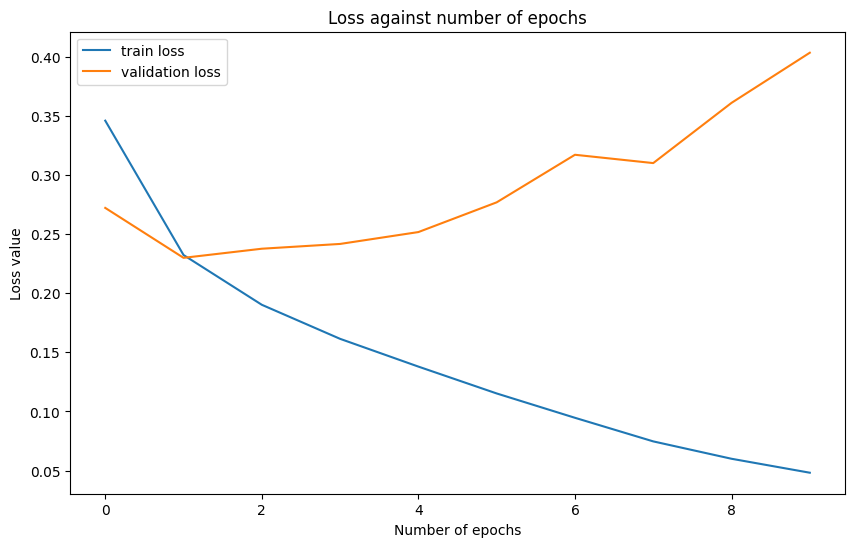

In [113]:
plt.figure(figsize=(10, 6))

plt.plot(train_loss_lst)
plt.plot(val_loss_lst)

plt.xlabel("Number of epochs")
plt.ylabel("Loss value")
plt.title("Loss against number of epochs")

plt.legend(['train loss', 'validation loss'])

plt.show()

Plot training and testing accuracy

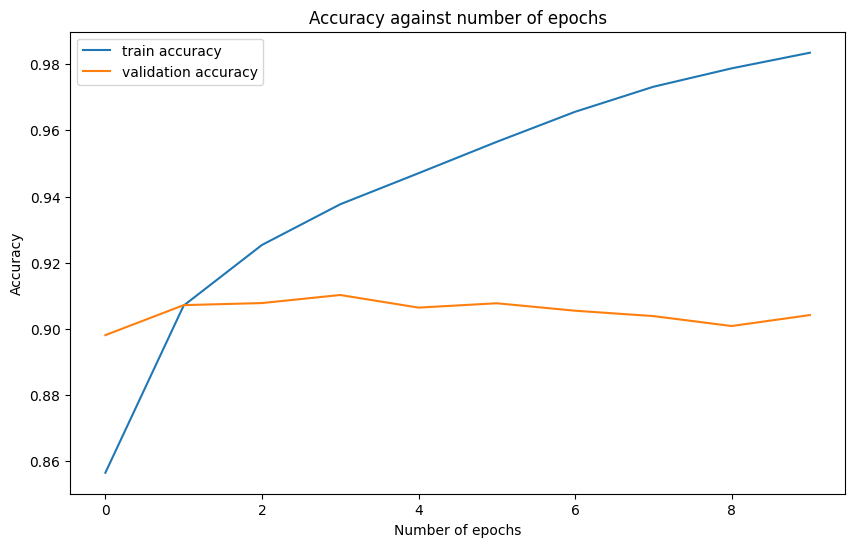

In [114]:
plt.figure(figsize=(10, 6))

plt.plot(train_acc)
plt.plot(val_acc)

plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy against number of epochs")

plt.legend(['train accuracy', 'validation accuracy'])

plt.show()

# Trying the model on test data

In [117]:
vocab_size = len(vocab)
embedding_dim = 300
hidden_dim = 300
output_dim = 2 # binary classification
n_layers = 2
dropout = 0.5

best_model = RNN(
    vocab_size,
    hidden_dim,
    output_dim,
    n_layers,
    dropout
)

best_model.load_state_dict(torch.load('rnn.pt'))
best_model.to(device)
best_model.eval()
test_loss = 0
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.view(-1).type(torch.LongTensor).to(device)

        batch_size = inputs.size(0)
        hidden = best_model.init_hidden(batch_size).to(device)

        output, hidden = best_model(inputs, hidden)
        loss = criterion(output, targets)

        test_loss += loss.item()

        # Calculate test accuracy
        _, predicted = torch.max(output.data, 1)
        test_total += targets.size(0)
        test_correct += (predicted == targets).sum().item()

average_test_loss = test_loss / len(test_loader)
test_accuracy = test_correct / test_total

print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.2447, Test Accuracy: 0.9005
